In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [2]:
# Read the CSV file into a Pandas DataFrame
diabetes_df = pd.read_csv(Path("../diabetes.csv"))

# Review the DataFrame
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Prepare the Data 

In [3]:
 # Define features set
X = diabetes_df.copy()
X.drop("Outcome", axis=1, inplace=True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
# Define target vector
y = diabetes_df["Outcome"].ravel()
y[:5]

array([1, 0, 1, 0, 1])

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [8]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [9]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [10]:
# Displaying results
print("Confusion Matrix (Random Forest)")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix (Random Forest)


,Predicted 0,Predicted 1
Actual 0,111,18
Actual 1,24,39


Accuracy Score : 0.78125
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       129
           1       0.68      0.62      0.65        63

    accuracy                           0.78       192
   macro avg       0.75      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [11]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
over_sample_model = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = over_sample_model.fit_resample(X_train, y_train)

In [12]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# Fit the model using the resampled training data
rf_model.fit(X_resampled, y_resampled)
# Make a prediction using the testing data
predictions = rf_model.predict(X_resampled)

predictions_df = pd.DataFrame({"Actual": y_resampled, "Prediction": predictions})
                        
predictions_df

,Actual,Prediction
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
737,1,1
738,1,1
739,1,1
740,1,1


In [13]:
# Print the balanced_accuracy score of the model 
balanced_acc_score = balanced_accuracy_score(y_resampled, predictions)

In [14]:
# Print the classification report for the model
print("Confusion Matrix (Random Forest)")
display(cm_df)
print(f"Accuracy Score: {balanced_acc_score}")
print("Classification Report")
print(classification_report(y_resampled, predictions))

Confusion Matrix (Random Forest)


,Predicted 0,Predicted 1
Actual 0,111,18
Actual 1,24,39


Accuracy Score: 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       371

    accuracy                           1.00       742
   macro avg       1.00      1.00      1.00       742
weighted avg       1.00      1.00      1.00       742



In [15]:
# Get the feature importances (using feature_importances_)
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importances_df = feature_importances_df.sort_values('Importance', ascending=True)

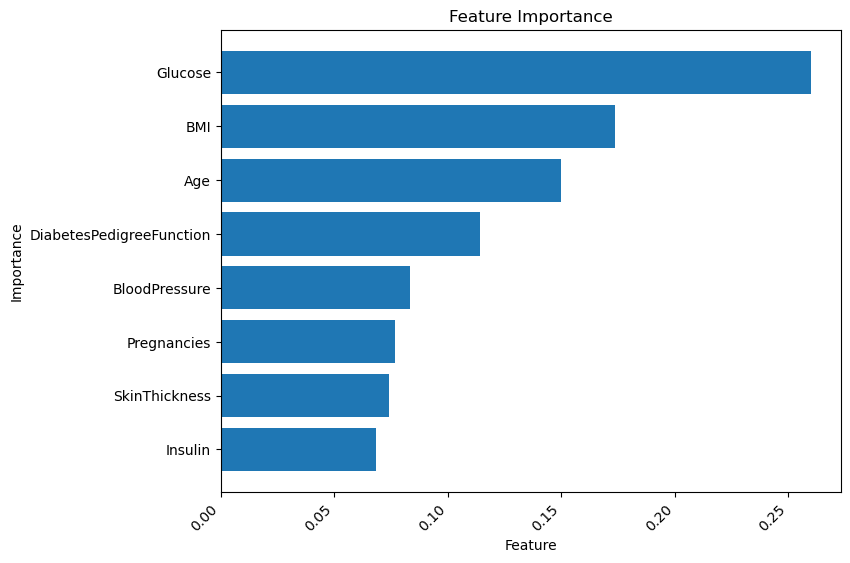

In [20]:
# Plot feature importances in a hbar
plt.figure(figsize=(8, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.savefig('feature_importance.jpg')
plt.show()


In [17]:
# Change Variable Display from '0' and '1' to 'Non Diabetic' and 'Diabetic'
predictions_df['Actual']= predictions_df['Actual'].replace({0: 'Non Diabetic', 1: 'Diabetic'})
predictions_df['Prediction']= predictions_df['Prediction'].replace({0: 'Non Diabetic', 1: 'Diabetic'})

In [21]:
# Create pandas dataframe with the trained data
testing_data = pd.concat([X_resampled, predictions_df], axis=1)
testing_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual,Prediction
0,0,137,40,35,168,43.1,2.288,33,Diabetic,Diabetic
1,8,181,68,36,495,30.1,0.615,60,Diabetic,Diabetic
2,8,194,80,0,0,26.1,0.551,67,Non Diabetic,Non Diabetic
3,7,114,76,17,110,23.8,0.466,31,Non Diabetic,Non Diabetic
4,1,173,74,0,0,36.8,0.088,38,Diabetic,Diabetic
5,7,184,84,33,0,35.5,0.355,41,Diabetic,Diabetic
6,0,145,0,0,0,44.2,0.630,31,Diabetic,Diabetic
7,5,158,84,41,210,39.4,0.395,29,Diabetic,Diabetic
8,4,76,62,0,0,34.0,0.391,25,Non Diabetic,Non Diabetic
9,7,159,64,0,0,27.4,0.294,40,Non Diabetic,Non Diabetic


In [19]:
testing_data.to_csv('rf_testing_data.csv')